<a href="https://colab.research.google.com/github/AnuBaluguri/Churn-Prediction/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Churn_Modelling.csv')

In [ ]:
df.shape

(10000, 14)

# Checking for missing values

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# Get unique count for each variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
# Drop the columns which does not effect the output
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [ ]:
# Reviewing the top five rows of dataframe
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Check variable data types
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Data Preprocessing

In [ ]:
# Arranging columns by data type for easier manipulation
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
df = df[['Exited'] + continuous_vars + cat_vars]
df.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography,Gender
0,1,619,42,2,0.00,1,101348.88,1,1,France,Female
1,0,608,41,1,83807.86,1,112542.58,0,1,Spain,Female
2,1,502,42,8,159660.80,3,113931.57,1,0,France,Female
3,0,699,39,1,0.00,2,93826.63,0,0,France,Female
4,0,850,43,2,125510.82,1,79084.10,1,1,Spain,Female


In [ ]:
#For the one hot variables, we change 0 to -1 so that the models can capture a negative relation
df.loc[df.HasCrCard == 0, 'HasCrCard'] = -1
df.loc[df.IsActiveMember == 0, 'IsActiveMember'] = -1
df.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography,Gender
0,1,619,42,2,0.00,1,101348.88,1,1,France,Female
1,0,608,41,1,83807.86,1,112542.58,-1,1,Spain,Female
2,1,502,42,8,159660.80,3,113931.57,1,-1,France,Female
3,0,699,39,1,0.00,2,93826.63,-1,-1,France,Female
4,0,850,43,2,125510.82,1,79084.10,1,1,Spain,Female


In [ ]:
# One hot encode the categorical variables
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (df[i].dtype == np.str or df[i].dtype == np.object):
        for j in df[i].unique():
            df[i+'_'+j] = np.where(df[i] == j,1,-1)
        remove.append(i)
df = df.drop(remove, axis=1)
df.head()

<ipython-input-12-e8f30b0ddb4d>:5: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (df[i].dtype == np.str or df[i].dtype == np.object):
<ipython-input-12-e8f30b0ddb4d>:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (df[i].dtype == np.str or df[i].dtype == np.object):
<ipython-input-12-e8f30b0ddb4d>:5: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` 

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,1,619,42,2,0.00,1,101348.88,1,1,1,-1,-1,1,-1
1,0,608,41,1,83807.86,1,112542.58,-1,1,-1,1,-1,1,-1
2,1,502,42,8,159660.80,3,113931.57,1,-1,1,-1,-1,1,-1
3,0,699,39,1,0.00,2,93826.63,-1,-1,1,-1,-1,1,-1
4,0,850,43,2,125510.82,1,79084.10,1,1,-1,1,-1,1,-1


In [ ]:
# minMax scaling the continuous variables
minVec = df[continuous_vars].min().copy()
maxVec = df[continuous_vars].max().copy()
df[continuous_vars] = (df[continuous_vars]-minVec)/(maxVec-minVec)
df.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,1,0.538,0.324324,0.2,0.000000,0.000000,0.506735,1,1,1,-1,-1,1,-1
1,0,0.516,0.310811,0.1,0.334031,0.000000,0.562709,-1,1,-1,1,-1,1,-1
2,1,0.304,0.324324,0.8,0.636357,0.666667,0.569654,1,-1,1,-1,-1,1,-1
3,0,0.698,0.283784,0.1,0.000000,0.333333,0.469120,-1,-1,1,-1,-1,1,-1
4,0,1.000,0.337838,0.2,0.500246,0.000000,0.395400,1,1,-1,1,-1,1,-1


# Feature Selection

In [ ]:
correlations = df.corr()['Exited'][:-1]

In [ ]:
# Compute the average correlation among features
average_correlation = df.iloc[:, :-1].corr().mean().mean()

In [ ]:
# Create a list to store selected features
selected_features = []

# Iterate through features and select those with higher correlation than average
for feature, corr in correlations.iteritems():
    if corr > average_correlation:
        selected_features.append(feature)

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
['Exited', 'Age', 'Balance', 'Geography_Germany', 'Gender_Female']


<ipython-input-17-3a8fff3ad2d8>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for feature, corr in correlations.iteritems():


In [ ]:
X = df.drop(['Exited','CreditScore', 'Tenure', 'NumOfProducts','EstimatedSalary','HasCrCard','IsActiveMember','Geography_France','Geography_Spain','Gender_Male'], axis = 1)
Y = df['Exited']

In [ ]:
X.head()

,Age,Balance,Geography_Germany,Gender_Female
0,0.324324,0.000000,-1,1
1,0.310811,0.334031,-1,1
2,0.324324,0.636357,-1,1
3,0.283784,0.000000,-1,1
4,0.337838,0.500246,-1,1


In [ ]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
X.shape

(10000, 4)

In [ ]:
Y.shape

(10000,)

# Splitting the training and testing data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

# Building the model

In [ ]:
import keras  #Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code
#from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop,Adadelta,SGD,Adagrad,Adam

In [ ]:
First_Layer_Size = 32 # Number of neurons in first layer
model=Sequential()
model.add(Dense(First_Layer_Size,activation='relu', input_shape=(4,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(45,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                160       
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 45)                1485      
                                                                 
 dense_11 (Dense)            (None, 32)                1472      
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4206 (16.43 KB)
Trainable params: 4206 (16.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy','Precision','Recall'])

# Training the model

In [ ]:
history = model.fit(X_train,Y_train,batch_size=1,epochs=35,verbose=1)

Epoch 1/35
8000/8000 [==============================] - 21s 2ms/step - loss: 0.4167 - accuracy: 0.8209 - precision: 0.6333 - recall: 0.3174
Epoch 2/35
8000/8000 [==============================] - 18s 2ms/step - loss: 0.4175 - accuracy: 0.8185 - precision: 0.6403 - recall: 0.2787
Epoch 3/35
8000/8000 [==============================] - 18s 2ms/step - loss: 0.4161 - accuracy: 0.8200 - precision: 0.6412 - recall: 0.2938
Epoch 4/35
8000/8000 [==============================] - 18s 2ms/step - loss: 0.4192 - accuracy: 0.8181 - precision: 0.6380 - recall: 0.2781
Epoch 5/35
8000/8000 [==============================] - 18s 2ms/step - loss: 0.4168 - accuracy: 0.8177 - precision: 0.6416 - recall: 0.2684
Epoch 6/35
8000/8000 [==============================] - 20s 2ms/step - loss: 0.4187 - accuracy: 0.8205 - precision: 0.6469 - recall: 0.2902
Epoch 7/35
8000/8000 [==============================] - 18s 2ms/step - loss: 0.4164 - accuracy: 0.8202 - precision: 0.6425 - recall: 0.2944
Epoch 8/35
8000/8000

In [ ]:
# Training history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']


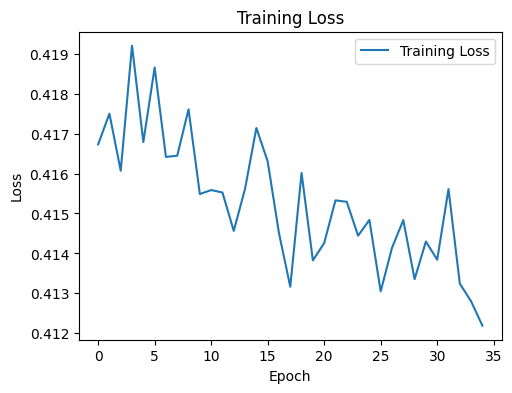

In [ ]:
# Plotting training loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


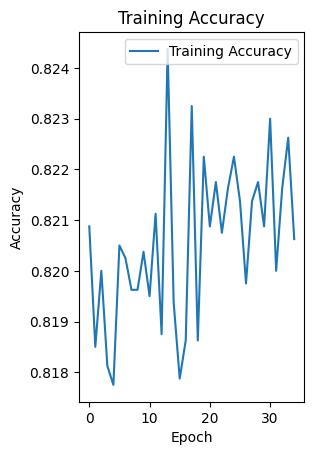

In [ ]:
# Plotting training accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Evaluating the model

In [ ]:
# Write the testing input and output variables
score = model.evaluate(X_test, Y_test, verbose=2)
print('Test loss:', score[0])

63/63 - 1s - loss: 0.4174 - accuracy: 0.8180 - precision: 0.5459 - recall: 0.2950 - 505ms/epoch - 8ms/step
Test loss: 0.41739004850387573


In [ ]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [ ]:
import tensorflow as tf
from tensorflow.keras.metrics import Precision, Recall

class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = Precision()
        self.recall = Recall()
    def update_state(self, Y_test, y_pred, sample_weight=None):
        self.precision.update_state(Y_test, y_pred, sample_weight)
        self.recall.update_state(Y_test, y_pred, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + tf.keras.backend.epsilon()))

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()

In [ ]:
# Test loss and accuracy
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.41739004850387573
Test accuracy: 0.8180000185966492
